In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np

In [3]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train = x_train / 255.0
x_test = x_test / 255.0
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [8]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [10]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [12]:
history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8970 - loss: 0.3295 - val_accuracy: 0.9844 - val_loss: 0.0480
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9842 - loss: 0.0509 - val_accuracy: 0.9856 - val_loss: 0.0427
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9899 - loss: 0.0325 - val_accuracy: 0.9906 - val_loss: 0.0305
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.9928 - loss: 0.0232 - val_accuracy: 0.9900 - val_loss: 0.0325
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9937 - loss: 0.0198 - val_accuracy: 0.9907 - val_loss: 0.0294


In [14]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9880 - loss: 0.0372
Test Accuracy: 0.9907


In [16]:
def predict_digit(img):
    img = img.reshape(1, 28, 28, 1)
    prediction = model.predict(img)
    return np.argmax(prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


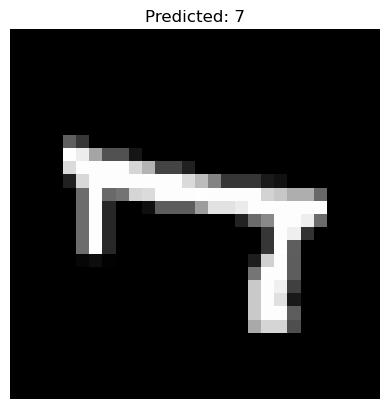

In [24]:
sample_index = np.random.randint(len(x_test))
plt.imshow(x_test[sample_index].reshape(28, 28), cmap='gray')
predicted_label = predict_digit(x_test[sample_index])
plt.title(f"Predicted: {predicted_label}")
plt.axis('off')
plt.show()